In [1]:
%run functions.py

In [2]:
table = 'eth-tokens.test.clean_avg_with_balances_tokens'
label_table = 'eth-tokens.alldata.etherscan_labelcloud'

In [3]:
df, dflabel = load_data_from_bigquery(table, label_table)

In [4]:
results = data_pipeline(df)

In [5]:
cl = cluster(results, n_clusters=8)

In [6]:
assign_cluster_to_data(df, dflabel, cl)

In [7]:
tsne_results = calc_tsne(results)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 35917 samples in 0.025s...
[t-SNE] Computed neighbors for 35917 samples in 10.644s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35917
[t-SNE] Computed conditional probabilities for sample 2000 / 35917
[t-SNE] Computed conditional probabilities for sample 3000 / 35917
[t-SNE] Computed conditional probabilities for sample 4000 / 35917
[t-SNE] Computed conditional probabilities for sample 5000 / 35917
[t-SNE] Computed conditional probabilities for sample 6000 / 35917
[t-SNE] Computed conditional probabilities for sample 7000 / 35917
[t-SNE] Computed conditional probabilities for sample 8000 / 35917
[t-SNE] Computed conditional probabilities for sample 9000 / 35917
[t-SNE] Computed conditional probabilities for sample 10000 / 35917
[t-SNE] Computed conditional probabilities for sample 11000 / 35917
[t-SNE] Computed conditional probabilities for sample 12000 / 35917
[t-SNE] Computed conditional probabilities for s

/home/ubuntu/ethereum_clustering/functions.py:92: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])


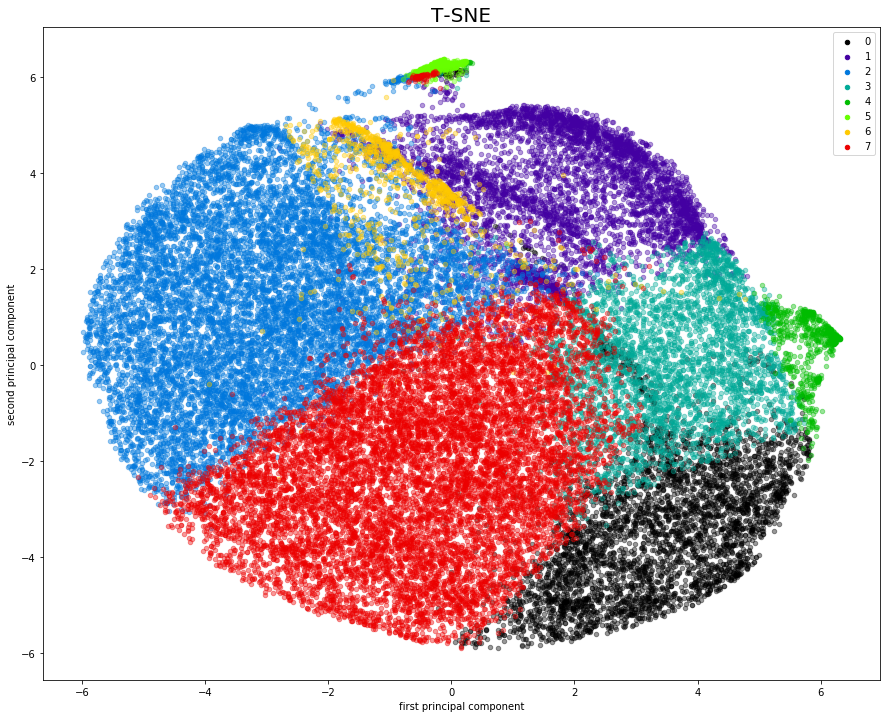

In [8]:
plot_tsne(cl, tsne_results)

In [9]:
#highlighting clusters of interest
categs = ('Exchange', 'Mining')#, 'ICO Wallets')
colors = ('green', 'blue')#, 'orange')

d = {}
for c in categs:
    d[c] = find_category_of_cluster(cl,dflabel, category=c)

clusters= list(d.values())

Exchange
4 45
Mining
4 11


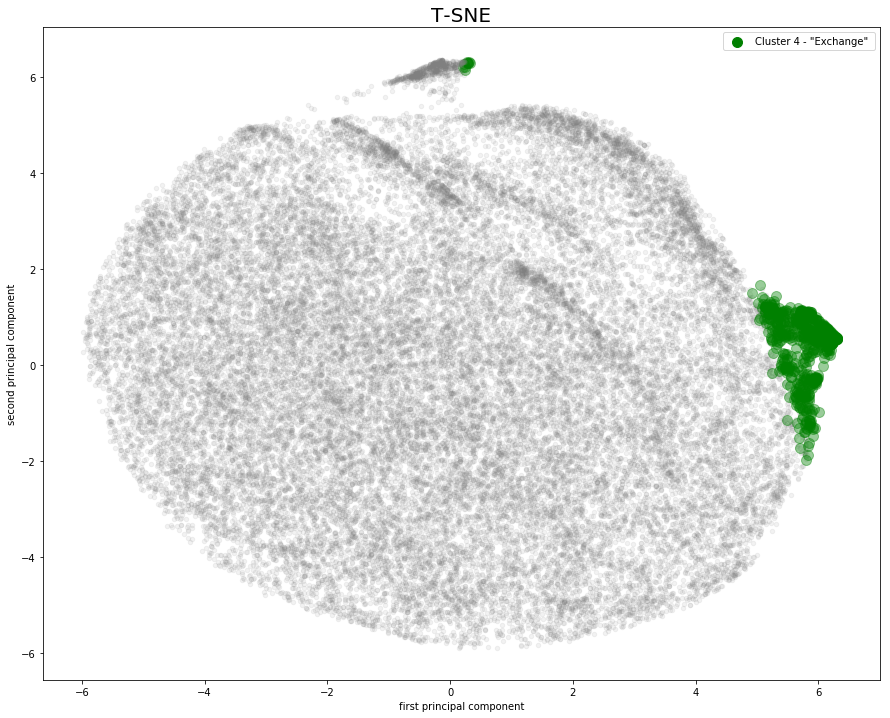

In [10]:
plot_tsne_with_labeled_clusters(tsne_results, cl, clusters, categs, colors)

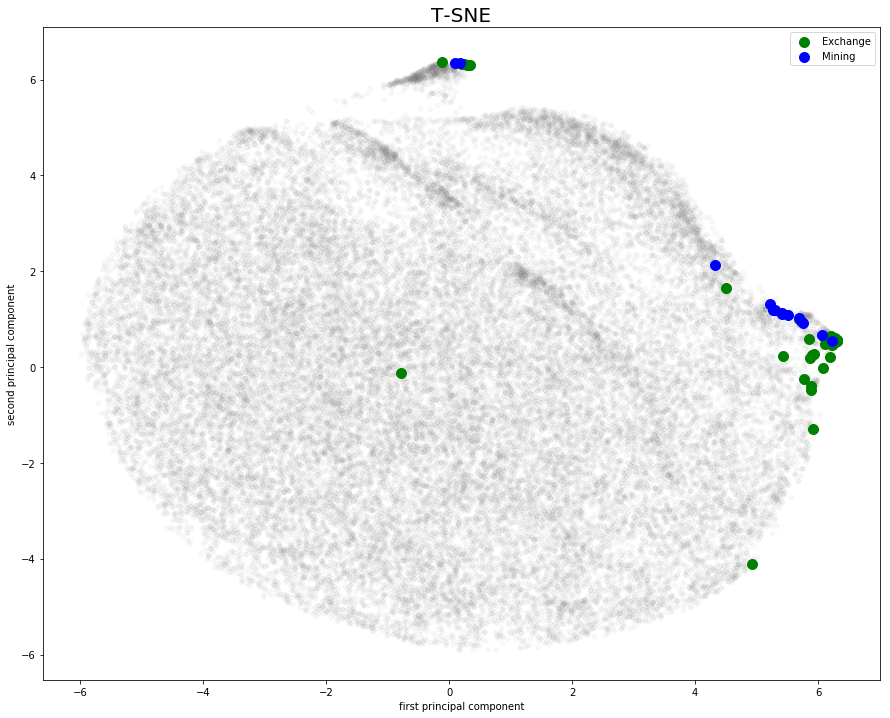

In [11]:
plot_tsne_with_labels(tsne_results,df, dflabel,categs,colors)

In [12]:
#recluster with only clusters of interest - will help with separation

subcl, subresults, newdf = recluster(df, cl, clusters, n_clusters=3)

In [13]:
sub_tsne_results = calc_tsne(subresults)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 658 samples in 0.001s...
[t-SNE] Computed neighbors for 658 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 658 / 658
[t-SNE] Mean sigma: 1.467892
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.870640
[t-SNE] KL divergence after 300 iterations: 0.806427
t-SNE done! Time elapsed: 1.3365838527679443 seconds


In [14]:
#highlighting clusters of interest

d = {}
for c in categs:
    d[c] = find_category_of_cluster(subcl,dflabel, category=c)

subclusters= list(d.values())

Exchange
0 2
Mining
0 0


/home/ubuntu/ethereum_clustering/functions.py:92: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])


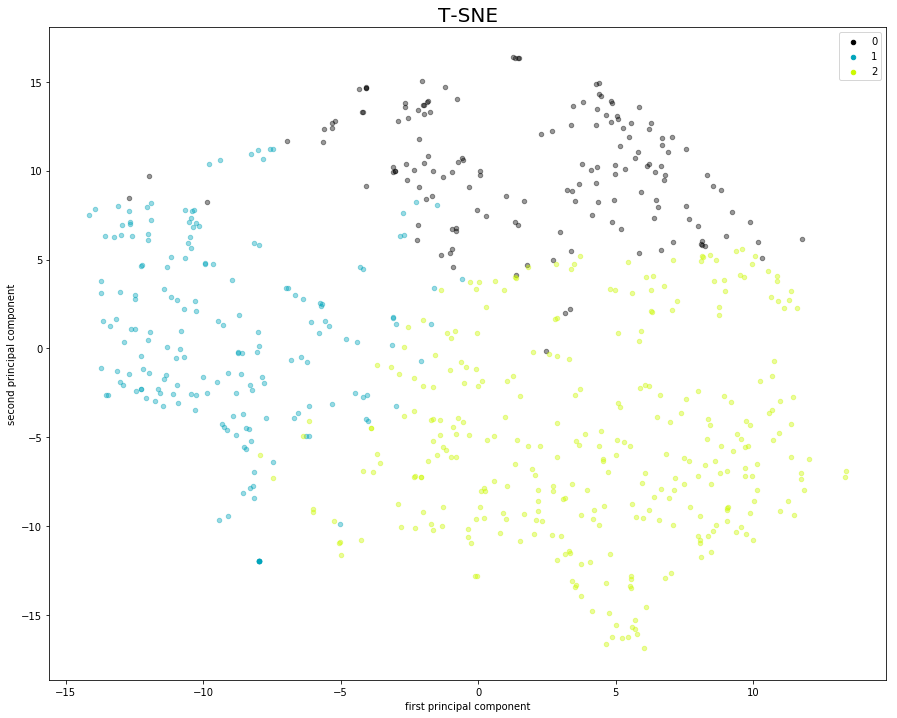

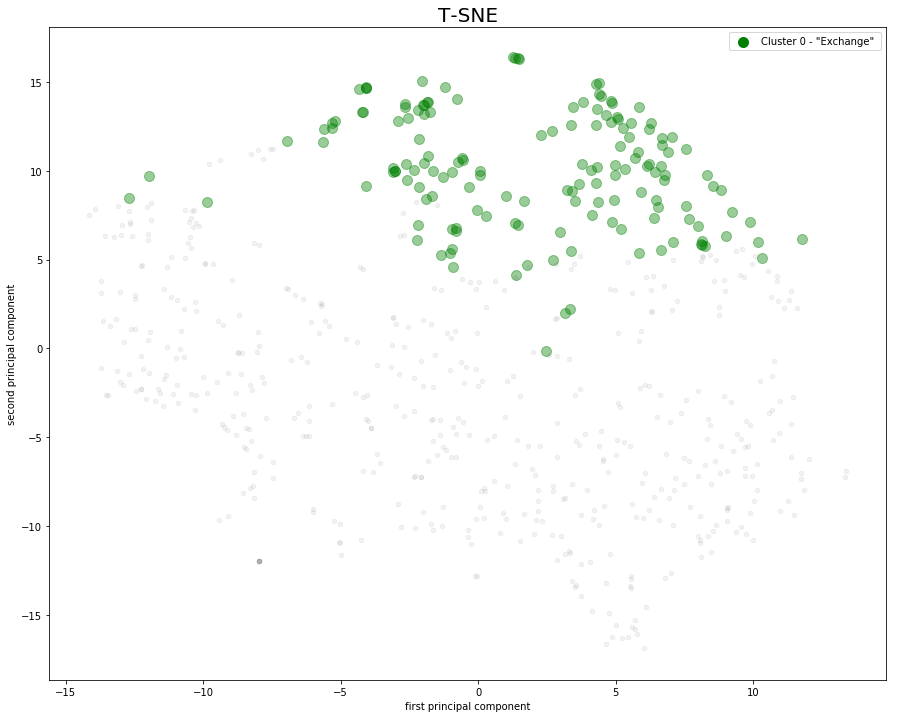

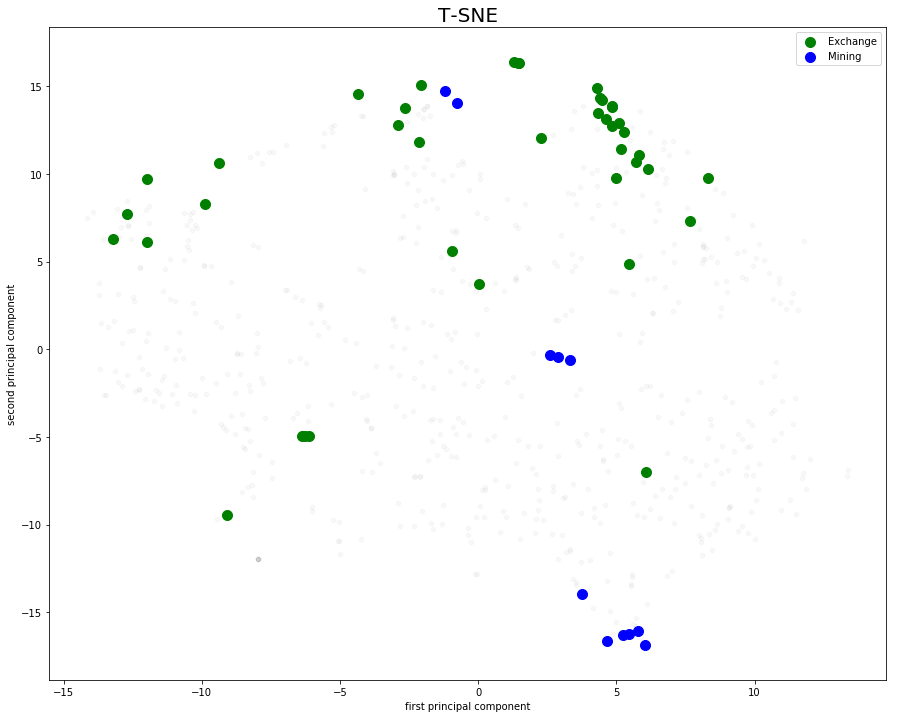

In [15]:
plot_all(sub_tsne_results,subcl,newdf,dflabel,subclusters,categs,colors )


Next steps : fix find_category_of_cluster function. The function itself would be fine if I could reassign the cluster number contained in dflabel.